## DATA 240: Assignment No: 3

### 1. Linear regression with gradient decent 

Please download housing.csv. This is a real-life dataset consisting of housing sales prices in the city of Windsor,
Ontario, Canada. You can find a description of the variables in housing.txt. Our target variable is ‘price’

Importing only the allowed libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
housing_df = pd.read_csv('housing.csv')

In [3]:
housing_df.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000,5850,3,1,2,yes,no,yes,no,no,1,no
1,38500,4000,2,1,1,yes,no,no,no,no,0,no
2,49500,3060,3,1,1,yes,no,no,no,no,0,no
3,60500,6650,3,1,2,yes,yes,no,no,no,0,no
4,61000,6360,2,1,1,yes,no,no,no,no,0,no


In [4]:
housing_df.shape

(546, 12)

Description of columns: 

sell = sale price of a house \
lot = the lot size of a property in square feet \
bdms = the number of bedrooms \
fb = the number of full bathrooms \
sty = the number of stories excluding basement \
drv = 1 if the house has a driveway \
rec = 1 if the house has a recreational room \
ffin = 1 if the house has a full finished basement \
ghw = 1 if the house uses gas for hot water heating \
ca = 1 if there is central air conditioning \
gar = the number of garage places \
reg = 1 if the house is located in the preferred neighbourhood of the city

In [5]:
housing_df.isna().sum()

price       0
lotsize     0
bedrooms    0
bathrms     0
stories     0
driveway    0
recroom     0
fullbase    0
gashw       0
airco       0
garagepl    0
prefarea    0
dtype: int64

There are no missing values in housing.csv

In [6]:
housing_df.dtypes

price        int64
lotsize      int64
bedrooms     int64
bathrms      int64
stories      int64
driveway    object
recroom     object
fullbase    object
gashw       object
airco       object
garagepl     int64
prefarea    object
dtype: object

Checking the unique values, the categorical columns possesses.

In [7]:
housing_df['bedrooms'].unique()

array([3, 2, 4, 1, 5, 6])

In [8]:
housing_df['bathrms'].unique()


array([1, 2, 3, 4])

In [9]:
housing_df['stories'].unique()

array([2, 1, 3, 4])

In [10]:
housing_df['driveway'].unique()

array(['yes', 'no'], dtype=object)

In [11]:
housing_df['garagepl'].unique()

array([1, 0, 2, 3])

Mapping categorical columns having object datatype to binary values

In [12]:
categorical_columns = ['driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'prefarea']
for col in categorical_columns:
    housing_df[col] = housing_df[col].map({'yes': 1, 'no': 0})

In [13]:
housing_df.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0


In [14]:
housing_df.dtypes

price       int64
lotsize     int64
bedrooms    int64
bathrms     int64
stories     int64
driveway    int64
recroom     int64
fullbase    int64
gashw       int64
airco       int64
garagepl    int64
prefarea    int64
dtype: object

housing.csv now has all numerical values and int datatype

Linear regression using gradient descent method from scratch. Before starting to implement gradient descent, we shall normalise all the variables excluding price (which is our target variable) using Z-score Normalisation.

In [15]:
X = housing_df.drop(columns=['price'])
y = housing_df['price']

Z-Score Normalisation

In [16]:
X_norm = (X - X.mean()) / X.std()

In [17]:
X_norm

,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,0.322732,0.047192,-0.568973,0.221501,0.404819,-0.464371,1.362070,-0.218853,-0.680410,0.357239,-0.552865
1,-0.530526,-1.308947,-0.568973,-0.930304,0.404819,-0.464371,-0.732832,-0.218853,-0.680410,-0.803788,-0.552865
2,-0.964074,0.047192,-0.568973,-0.930304,0.404819,-0.464371,-0.732832,-0.218853,-0.680410,-0.803788,-0.552865
3,0.691709,0.047192,-0.568973,0.221501,0.404819,2.149509,-0.732832,-0.218853,-0.680410,-0.803788,-0.552865
4,0.557955,-1.308947,-0.568973,-0.930304,0.404819,-0.464371,-0.732832,-0.218853,-0.680410,-0.803788,-0.552865
...,...,...,...,...,...,...,...,...,...,...,...
541,-0.161550,0.047192,1.422433,2.525111,0.404819,2.149509,-0.732832,-0.218853,1.467011,-0.803788,-0.552865
542,0.391915,0.047192,1.422433,2.525111,0.404819,-0.464371,-0.732832,-0.218853,1.467011,-0.803788,-0.552865
543,0.391915,0.047192,1.422433,2.525111,0.404819,2.149509,-0.732832,-0.218853,1.467011,0.357239,-0.552865
544,0.391915,0.047192,1.422433,0.221501,0.404819,2.149509,-0.732832,-0.218853,1.467011,0.357239,-0.552865


Adding a column of ones to X to account for the bias (intercept) term

In [18]:
X_norm.insert(0,'bias',1)

Converting X and y to numpy arrays

In [19]:
X_norm_1 = X_norm.values

In [20]:
display(X_norm_1)

array([[ 1.        ,  0.32273211,  0.04719162, ..., -0.68040981,
         0.35723902, -0.55286459],
       [ 1.        , -0.53052646, -1.30894664, ..., -0.68040981,
        -0.80378779, -0.55286459],
       [ 1.        , -0.96407405,  0.04719162, ..., -0.68040981,
        -0.80378779, -0.55286459],
       ...,
       [ 1.        ,  0.39191523,  0.04719162, ...,  1.46701074,
         0.35723902, -0.55286459],
       [ 1.        ,  0.39191523,  0.04719162, ...,  1.46701074,
         0.35723902, -0.55286459],
       [ 1.        ,  0.39191523,  0.04719162, ...,  1.46701074,
         0.35723902, -0.55286459]])

In [21]:
y = y.values

1-1. Please build a gradient descent algorithm based on the following formulas

<img src= "attachment:d6f2a9be-c70b-4cb5-a3a8-350fe723a93d.png" width="300">

In [22]:
# Cost function
def compute_cost(X, y, weights):
    m = len(y)
    y_pred = np.dot(X, weights)
    cost = (1 / m) * np.sum((y_pred - y) ** 2)
    return cost

# RMSE calculation
def compute_rmse(y_pred, y):
    rmse = np.sqrt(np.mean((y_pred - y) ** 2))
    return rmse

<img src="attachment:515873ef-10e2-4b13-8101-e5d3cc6f2f75.png" width="300">

Initialize weights and set hyperparameters

Initializing weights to be a random number between 0 and 1, and then multiplying by 0.01 to scale the values down to be small and near-zero but not zero. This is useful for optimization algorithms like gradient descent.

In [23]:
X_norm_1.shape[1]

12

In [24]:
W = np.random.rand(X_norm_1.shape[1]) * 0.01
learning_rate = 0.25
epochs = 20
m = len(y)

Implementing Gradient Descent on the given data

In [25]:
for epoch in range(epochs):
    #compute predictions with initial weights
    Y_pred = np.dot(X_norm_1, W)  

    #compute error
    errors = Y_pred - y

    #calculate gradients
    gradients = (2/m) * np.dot(X_norm_1.T, errors)

    #Update weights
    W -= learning_rate * gradients 
    
    #compute and print cost and RMSE for the current epoch
    cost = compute_cost(X_norm_1, y, W)
    rmse = compute_rmse(Y_pred, y)
    print(f"Epoch {epoch + 1}, Cost: {cost:.4f}, RMSE: {rmse:.4f}")

Optimal_weights = W

Epoch 1, Cost: 1416389470.1056, RMSE: 73159.2635
Epoch 2, Cost: 527869274.6163, RMSE: 37634.9501
Epoch 3, Cost: 307529033.1818, RMSE: 22975.4059
Epoch 4, Cost: 251985003.7993, RMSE: 17536.5057
Epoch 5, Cost: 237820582.1747, RMSE: 15874.0355
Epoch 6, Cost: 234130599.0492, RMSE: 15421.4326
Epoch 7, Cost: 233126982.2370, RMSE: 15301.3267
Epoch 8, Cost: 232830744.0320, RMSE: 15268.4964
Epoch 9, Cost: 232730755.4202, RMSE: 15258.7924
Epoch 10, Cost: 232690628.3982, RMSE: 15255.5156
Epoch 11, Cost: 232671620.1068, RMSE: 15254.2004
Epoch 12, Cost: 232661470.0828, RMSE: 15253.5773
Epoch 13, Cost: 232655651.7804, RMSE: 15253.2446
Epoch 14, Cost: 232652186.5549, RMSE: 15253.0539
Epoch 15, Cost: 232650080.1141, RMSE: 15252.9403
Epoch 16, Cost: 232648784.8744, RMSE: 15252.8712
Epoch 17, Cost: 232647982.9099, RMSE: 15252.8287
Epoch 18, Cost: 232647484.1359, RMSE: 15252.8025
Epoch 19, Cost: 232647172.9773, RMSE: 15252.7861
Epoch 20, Cost: 232646978.4398, RMSE: 15252.7759


In [26]:
print("\ngradients:\n", gradients)
print("\n Optimal weights:\n", Optimal_weights)


gradients:
 [ -0.25986326  -8.63641887  13.86169793   0.91037406 -17.35253541
   6.17845468   6.93986664 -13.25266145   0.79801058   5.47481379
   0.11570901   2.75526399]

 Optimal weights:
 [68121.53210378  7681.06233908  1363.41749674  7200.64156874
  5675.76676439  2335.61245552  1732.20388273  2589.95755996
  2685.54878502  5888.46458244  3655.52705543  3975.7551691 ]


Fitting the data using the Linear regression model with the optimum Weight. 

In [27]:
predictions = np.dot(X_norm_1,Optimal_weights)

Plotting ‘price’ vs ‘lotsize’ on the original scale

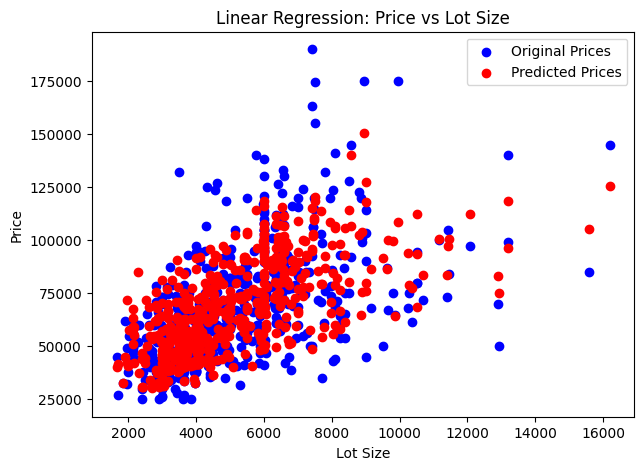

In [28]:
# housing_df['lotsize'] having original values
# y = housing_df['price'] having original values

plt.figure(figsize=(7, 5))
plt.scatter(housing_df['lotsize'], y, color='blue', label="Original Prices")
plt.scatter(housing_df['lotsize'], predictions, color='red', label="Predicted Prices")
plt.xlabel("Lot Size")
plt.ylabel("Price")
plt.title("Linear Regression: Price vs Lot Size")
plt.legend()
plt.show()

Please plot ‘true-price’(y) vs ‘predicted-price’(𝑦̂) and display R2. The y and 𝑦̂ should be original scale instead of
normalized scale. 

Calculating and displaying R^2

<img src= "attachment:a36ebd6b-fc3e-4e46-9952-2d43823c62d9.png" width="300">

In [29]:
ss_total = np.sum((y - np.mean(y)) ** 2)
ss_residual = np.sum((y - predictions) ** 2)
r_squared = 1 - (ss_residual / ss_total)
print(f"R^2: {r_squared}")

R^2: 0.6731231610882114


Plotting true-price (y) vs predicted-price (ŷ) on original scale

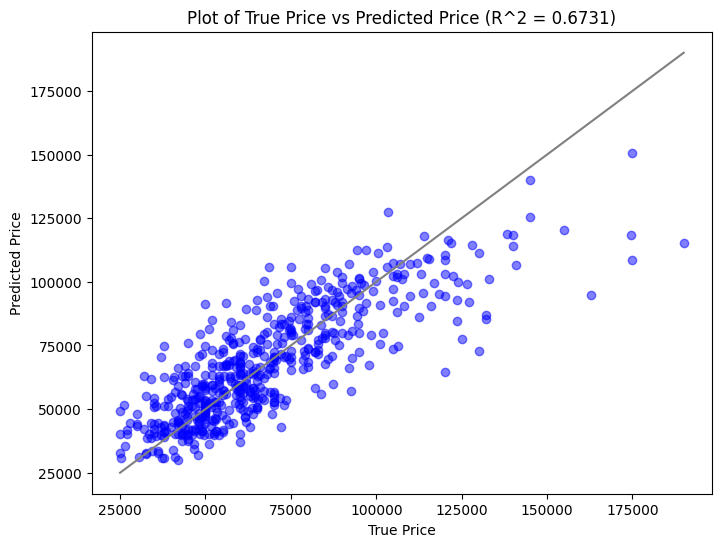

In [30]:
plt.figure(figsize=(8, 6))
plt.scatter(y, predictions, color='blue', alpha=0.5)
plt.xlabel("True Price")
plt.ylabel("Predicted Price")
plt.title(f"Plot of True Price vs Predicted Price (R^2 = {r_squared:.4f})")

#Add line of perfect fit
plt.plot([min(y), max(y)], [min(y), max(y)], color='gray')
plt.show()

### 1-2. Please build a gradient descent algorithm based on the following cost function.

<img src= "attachment:e7701b6e-77ea-4ee8-8cec-13afcf296965.png" width="200">

Please print out the Root Mean Squared Error (RMSE) every iteration (until 10 epochs).
Please fit the data using the Linear regression model with the optimum Weight.
Please plot ‘true-price’(y) vs ‘predicted-price’(𝑦̂) and display R2.

Setting new variable with X_new and y_new for features and target respectively

In [31]:
X_new = housing_df.drop(columns=['price'])
y_new = housing_df['price']

Z-score normalising variables

In [32]:
X_norm = (X_new - X_new.mean()) / X_new.std()

Adding bias

In [33]:
X_norm.insert(0,'bias',1)

convert X and y to numpy arrays

In [34]:
X_norm_2 = X_norm.values

In [35]:
Y= y_new.values

Initializing weights randomly having value between 0 and 1, and multiplying with 0.01 for getting small values not near zero

In [36]:
weights = np.random.rand(1, X_norm_2.shape[1]) * 0.01

In [37]:
print(weights)

[[0.00192998 0.00269164 0.0019595  0.00063317 0.00170443 0.00144071
  0.00874815 0.0029777  0.00091164 0.00925495 0.00790673 0.00772461]]


In [38]:
weights.shape

(1, 12)

In [39]:
X_norm_2.shape

(546, 12)

In [40]:
Y.shape

(546,)

In [41]:
Y = Y.reshape(-1, 1)

In [42]:
Y.shape

(546, 1)

Setting Learning rate and number of epochs

In [43]:
alpha = 0.25 # learning rate
epochs = 20 # epochs

Gradient Descent Algorithm

In [44]:
costs = []
rmses = []
for epoch in range(epochs):
    # Compute predictions: Ŷ = X · W^T
    Y_pred = X_norm_2.dot(weights.T)

    # Compute cost function J
    J = (1 / len(Y)) * ((Y_pred - Y).T.dot(Y_pred - Y))[0, 0]
    costs.append(J)

    # Compute gradient
    dW = (2 / len(Y)) * (Y_pred - Y).T.dot(X_norm_2)
    dW = dW.reshape(1, -1) # Reshaping to ensure the shape (1, 12), W.T and W shape should be same

    # Update weights
    weights -= alpha * dW

    # Calculate and store cost and RMSE for the epoch
    rmse = np.sqrt(np.mean((Y_pred - Y) ** 2))
    rmses.append(rmse)
    print(f"Epoch {epoch + 1}, Cost: {J:.4f}, RMSE: {rmse:.4f}")

final_weights = weights

Epoch 1, Cost: 5352277570.9777, RMSE: 73159.2617
Epoch 2, Cost: 1416389481.6802, RMSE: 37634.9503
Epoch 3, Cost: 527869279.1807, RMSE: 22975.4060
Epoch 4, Cost: 307529034.1902, RMSE: 17536.5058
Epoch 5, Cost: 251985003.9571, RMSE: 15874.0355
Epoch 6, Cost: 237820582.1510, RMSE: 15421.4326
Epoch 7, Cost: 234130598.9968, RMSE: 15301.3267
Epoch 8, Cost: 233126982.1895, RMSE: 15268.4964
Epoch 9, Cost: 232830743.9952, RMSE: 15258.7924
Epoch 10, Cost: 232730755.3934, RMSE: 15255.5156
Epoch 11, Cost: 232690628.3795, RMSE: 15254.2004
Epoch 12, Cost: 232671620.0940, RMSE: 15253.5773
Epoch 13, Cost: 232661470.0742, RMSE: 15253.2446
Epoch 14, Cost: 232655651.7747, RMSE: 15253.0539
Epoch 15, Cost: 232652186.5512, RMSE: 15252.9403
Epoch 16, Cost: 232650080.1117, RMSE: 15252.8712
Epoch 17, Cost: 232648784.8728, RMSE: 15252.8287
Epoch 18, Cost: 232647982.9089, RMSE: 15252.8025
Epoch 19, Cost: 232647484.1352, RMSE: 15252.7861
Epoch 20, Cost: 232647172.9769, RMSE: 15252.7759


In [45]:
print("Shape of dW:", dW.shape)

Shape of dW: (1, 12)


In [46]:
print(final_weights)

[[68121.53210378  7681.06233857  1363.41749012  7200.64156744
   5675.76677346  2335.61245168  1732.20388317  2589.95756278
   2685.54878394  5888.46457862  3655.52706022  3975.75517034]]


In [47]:
print("Shape of X_b:", X_norm_2.shape)

Shape of X_b: (546, 12)


This should be the shape of all matrix for doing matrix calculation for gradient descent

X_b is (546,12),\
Y is (546,1)\
Y_pred is (546,1),\
Y_pred - Y is (546,546),\
W = (1,12),\
WT = (12,1)\
dW =(1,12)

Calculate final predictions with optimized weights (final weights)

In [48]:
predictions = np.dot(X_norm_2,final_weights.T)

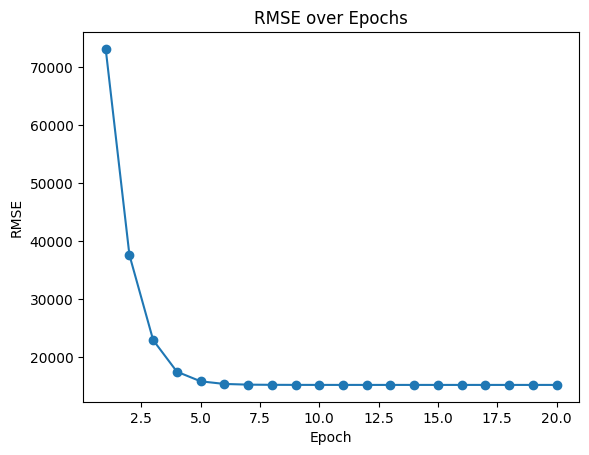

In [49]:
# Plot RMSE over epochs
plt.plot(range(1, epochs + 1), rmses, marker='o')
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.title("RMSE over Epochs")
plt.show()

Plotting ‘true-price’(y) vs ‘predicted-price’(𝑦̂) and displaying R2.

##### Calculate R^2 score manually

R^2: 0.6731231610885715


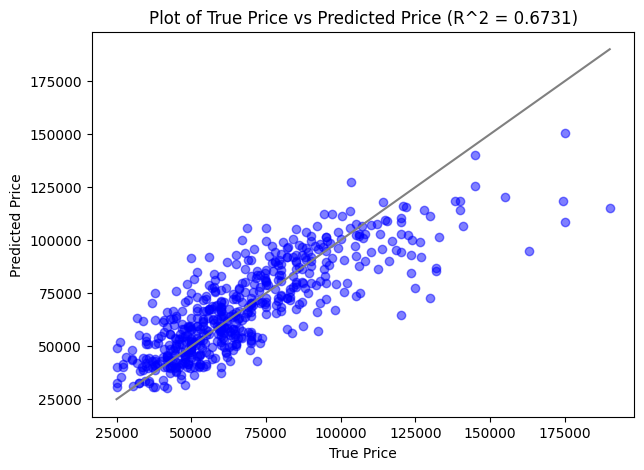

In [50]:
ss_total = np.sum((Y - np.mean(Y)) ** 2)
ss_residual = np.sum((Y - predictions) ** 2)
r_squared = 1 - (ss_residual / ss_total)
print(f"R^2: {r_squared}")

plt.figure(figsize=(7, 5))
plt.scatter(Y, predictions, color='blue', alpha=0.5)
plt.xlabel("True Price")
plt.ylabel("Predicted Price")
plt.title(f"Plot of True Price vs Predicted Price (R^2 = {r_squared:.4f})")

#Add line of perfect fit
plt.plot([min(y), max(y)], [min(y), max(y)], color='gray') 
plt.show()


## Thank you!